# Bitcoin Prediction Using Simrank Algorithm

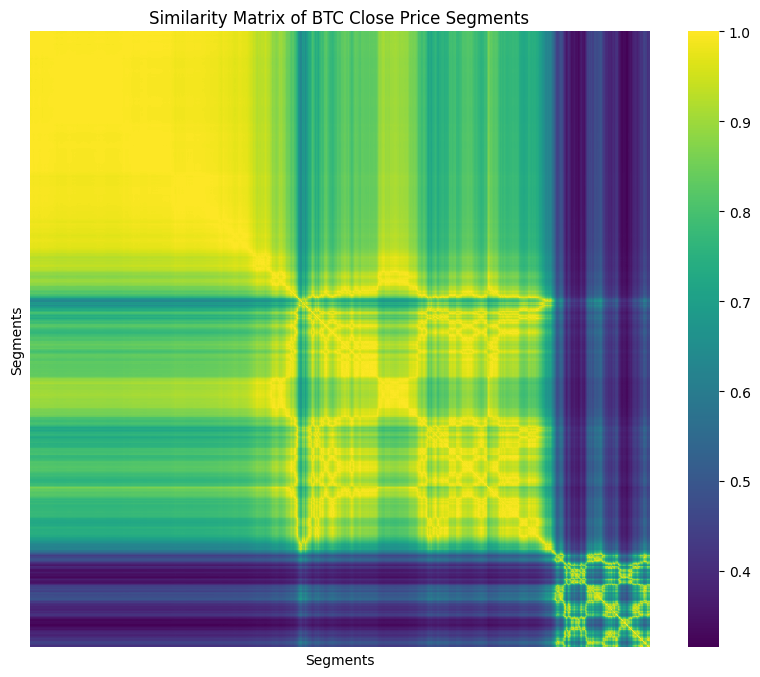

Predicted next close price: 41150.88


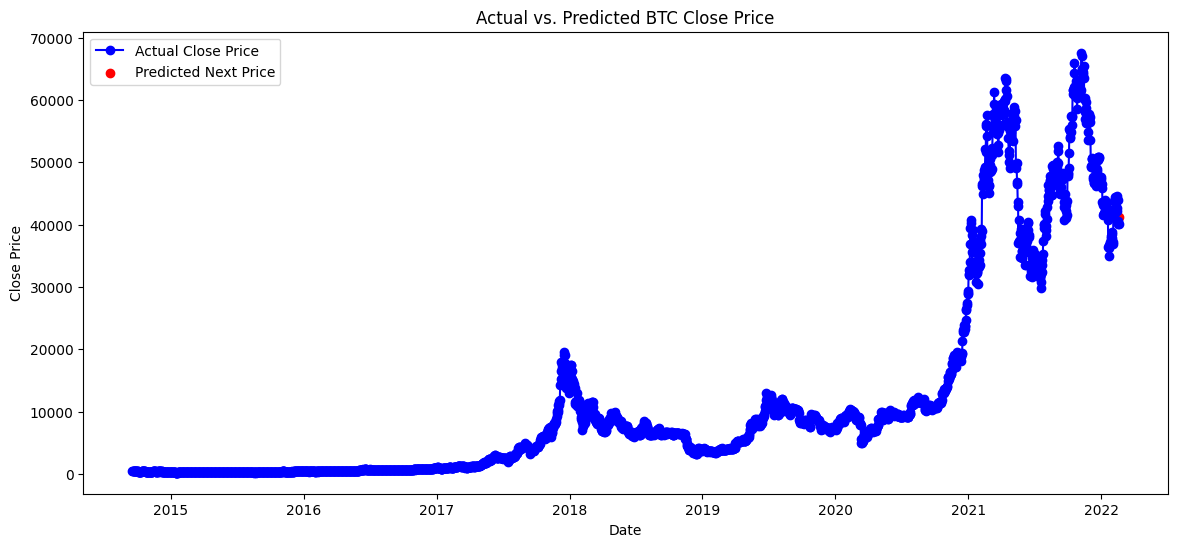

,Seg_0,Seg_1,Seg_2,Seg_3,Seg_4,Seg_5,Seg_6,Seg_7,Seg_8,Seg_9,...,Seg_2698,Seg_2699,Seg_2700,Seg_2701,Seg_2702,Seg_2703,Seg_2704,Seg_2705,Seg_2706,Seg_2707
Segment,,,,,,,,,,,,,,,,,,,,,
Seg_0,1.000000,0.999293,0.998893,0.999020,0.998855,0.999060,0.999589,0.999340,0.999054,0.998953,...,0.413032,0.410695,0.410702,0.412478,0.414660,0.416700,0.415499,0.413717,0.415593,0.418006
Seg_1,0.999293,1.000000,0.999285,0.999318,0.999318,0.999251,0.999535,0.999548,0.999421,0.999304,...,0.412972,0.410634,0.410640,0.412415,0.414595,0.416635,0.415437,0.413655,0.415531,0.417941
Seg_2,0.998893,0.999285,1.000000,0.999406,0.999265,0.999267,0.999139,0.999029,0.998998,0.999092,...,0.412986,0.410648,0.410651,0.412426,0.414606,0.416648,0.415452,0.413670,0.415542,0.417952
Seg_3,0.999020,0.999318,0.999406,1.000000,0.999418,0.999216,0.999195,0.999085,0.998875,0.998891,...,0.413019,0.410680,0.410684,0.412458,0.414639,0.416680,0.415484,0.413703,0.415576,0.417983
Seg_4,0.998855,0.999318,0.999265,0.999418,1.000000,0.999428,0.999202,0.999134,0.998962,0.998818,...,0.413022,0.410683,0.410688,0.412461,0.414641,0.416683,0.415486,0.413705,0.415581,0.417990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seg_2703,0.416700,0.416635,0.416648,0.416680,0.416683,0.416690,0.416688,0.416620,0.416565,0.416537,...,0.947724,0.950276,0.956728,0.965096,0.978859,1.000000,0.966449,0.956374,0.946262,0.940942
Seg_2704,0.415499,0.415437,0.415452,0.415484,0.415486,0.415491,0.415488,0.415420,0.415366,0.415339,...,0.964749,0.954486,0.944296,0.946260,0.952513,0.966449,1.000000,0.969449,0.932224,0.920986
Seg_2705,0.413717,0.413655,0.413670,0.413703,0.413705,0.413710,0.413706,0.413640,0.413585,0.413558,...,0.976574,0.967009,0.949697,0.942825,0.945937,0.956374,0.969449,1.000000,0.943629,0.914780


,Segment,Similarity Score
0,Seg_2707,1.000000
1,Seg_2565,0.961043
2,Seg_2564,0.959779
3,Seg_2678,0.955018
4,Seg_2701,0.953184
...,...,...
2703,Seg_122,0.416823
2704,Seg_121,0.416802
2705,Seg_120,0.416800
2706,Seg_118,0.416775


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

# Step 1: Load the data
btc_data = pd.read_csv("btc.csv", parse_dates=["Date"])
btc_data['Close'] = btc_data['Close'].astype(float)

# Step 2: Preprocess the data
scaler = MinMaxScaler()
btc_data['Close_Scaled'] = scaler.fit_transform(btc_data[['Close']])

# Step 3: Create segments for comparison
def create_segments(data, segment_length=5):
    segments = [data[i:i + segment_length] for i in range(len(data) - segment_length)]
    return np.array(segments)

# Step 4: Calculate SimRank-like similarity between segments
def calculate_simrank(segments):
    num_segments = segments.shape[0]
    similarity_matrix = np.zeros((num_segments, num_segments))

    for i in range(num_segments):
        for j in range(num_segments):
            if i != j:
                # Calculate similarity as the inverse of the Euclidean distance between segments
                distance = euclidean(segments[i], segments[j])
                similarity_matrix[i, j] = 1 / (1 + distance)  # Add 1 to avoid division by zero
            else:
                similarity_matrix[i, j] = 1  # Self-similarity is set to 1 for each segment
    
    return similarity_matrix

# Step 5: Predict the next price based on the most similar segments
def predict_next_price(similarity_matrix, segments, index=-1):
    similar_indices = np.argsort(-similarity_matrix[index])[1:6]  # Top 5 similar segments
    next_prices = [segments[i + 1][-1] for i in similar_indices if i + 1 < len(segments)]
    return np.mean(next_prices) if next_prices else np.nan

# Step 6: Apply segment creation and similarity calculation
segment_length = 5
segments = create_segments(btc_data['Close_Scaled'].values, segment_length)
similarity_matrix = calculate_simrank(segments)

# Step 7: Visualize Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Similarity Matrix of BTC Close Price Segments")
plt.xlabel("Segments")
plt.ylabel("Segments")
plt.show()

# Step 8: Predict and visualize results
predicted_price = predict_next_price(similarity_matrix, segments)
predicted_price_unscaled = scaler.inverse_transform([[predicted_price]])[0][0]

print(f"Predicted next close price: {predicted_price_unscaled:.2f}")

# Plot actual vs. predicted prices
btc_data['Predicted_Close'] = np.nan
btc_data.loc[len(btc_data) - 1, 'Predicted_Close'] = predicted_price_unscaled

plt.figure(figsize=(14, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label="Actual Close Price", color="blue", marker='o')
plt.scatter(btc_data['Date'].iloc[-1], predicted_price_unscaled, color="red", label="Predicted Next Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs. Predicted BTC Close Price")
plt.legend()
plt.show()

# Step 9: Tabulate similarity scores for each segment as a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, columns=[f"Seg_{i}" for i in range(len(similarity_matrix))])
similarity_df.insert(0, "Segment", [f"Seg_{i}" for i in range(len(similarity_matrix))])
similarity_df.set_index("Segment", inplace=True)

# Display the similarity matrix as a DataFrame
display(similarity_df)

# Display similarity scores for the last segment as a DataFrame
last_segment_similarity = similarity_df.iloc[-1].sort_values(ascending=False).reset_index()
last_segment_similarity.columns = ['Segment', 'Similarity Score']

# Display all similarity scores for the last segment
display(last_segment_similarity)

# SimRank Similarity Network Visualization

In [10]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 2.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
import networkx as nx

# Step 1: Load the data
btc_data = pd.read_csv("btc.csv", parse_dates=["Date"])
btc_data['Close'] = btc_data['Close'].astype(float)

# Step 2: Preprocess the data
scaler = MinMaxScaler()
btc_data['Close_Scaled'] = scaler.fit_transform(btc_data[['Close']])

# Step 3: Create segments for comparison
def create_segments(data, segment_length=5):
    segments = [data[i:i + segment_length] for i in range(len(data) - segment_length)]
    return np.array(segments)

# Step 4: Calculate SimRank-like similarity between segments
def calculate_simrank(segments):
    num_segments = segments.shape[0]
    similarity_matrix = np.zeros((num_segments, num_segments))

    for i in range(num_segments):
        for j in range(num_segments):
            if i != j:
                # Calculate similarity as the inverse of the Euclidean distance between segments
                distance = euclidean(segments[i], segments[j])
                similarity_matrix[i, j] = 1 / (1 + distance)  # Add 1 to avoid division by zero
            else:
                similarity_matrix[i, j] = 1  # Self-similarity is set to 1 for each segment
    
    return similarity_matrix

# Step 5: Create similarity matrix
segment_length = 5
segments = create_segments(btc_data['Close_Scaled'].values, segment_length)
similarity_matrix = calculate_simrank(segments)

# Step 6: Create SimRank node diagram
def create_simrank_node_diagram(similarity_matrix, threshold=0.5):
    num_segments = similarity_matrix.shape[0]
    G = nx.Graph()

    # Add nodes for each segment
    for i in range(num_segments):
        G.add_node(f"Seg_{i}")

    # Add edges based on similarity threshold
    for i in range(num_segments):
        for j in range(i+1, num_segments):
            if similarity_matrix[i, j] > threshold:  # Only add edges for high similarity
                G.add_edge(f"Seg_{i}", f"Seg_{j}", weight=similarity_matrix[i, j])

    # Draw the graph
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, seed=42)  # Position nodes
    edge_weights = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)
    plt.title("SimRank Node Diagram for BTC Price Segments")
    plt.show()

# Step 7: Visualize the SimRank node diagram
create_simrank_node_diagram(similarity_matrix, threshold=0.5)